In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Greenland = pd.read_excel(filepath, sheet_name='Greenland-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Greenland)
fp.date_time(Greenland)

,Extent,Date
0,1076123.146,1979-01-01
1,1099248.063,1979-02-01
2,1036964.901,1979-03-01
3,958927.937,1979-04-01
4,823812.694,1979-05-01
...,...,...
533,721350.515,2023-06-01
534,459033.164,2023-07-01
535,282045.909,2023-08-01
536,270397.608,2023-09-01


In [5]:
scaler = MinMaxScaler()
Greenland['Extent'] = scaler.fit_transform(Greenland['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 10
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Greenland['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((517, 12, 1), (517,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Greenland_model_LT10/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
43/53 [=======================>......] - ETA: 0s - loss: 0.2856 - root_mean_squared_error: 0.5344

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 6s 74ms/step - loss: 0.2851 - root_mean_squared_error: 0.5339 - val_loss: 0.1399 - val_root_mean_squared_error: 0.3740
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2340 - root_mean_squared_error: 0.4837

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.2316 - root_mean_squared_error: 0.4813 - val_loss: 0.1137 - val_root_mean_squared_error: 0.3371
Epoch 3/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1879 - root_mean_squared_error: 0.4335

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.1903 - root_mean_squared_error: 0.4362 - val_loss: 0.0895 - val_root_mean_squared_error: 0.2992
Epoch 4/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1569 - root_mean_squared_error: 0.3961

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.1496 - root_mean_squared_error: 0.3867 - val_loss: 0.0700 - val_root_mean_squared_error: 0.2645
Epoch 5/50
44/53 [=======================>......] - ETA: 0s - loss: 0.1213 - root_mean_squared_error: 0.3483

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.1188 - root_mean_squared_error: 0.3446 - val_loss: 0.0522 - val_root_mean_squared_error: 0.2285
Epoch 6/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0909 - root_mean_squared_error: 0.3016

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 51ms/step - loss: 0.0909 - root_mean_squared_error: 0.3015 - val_loss: 0.0377 - val_root_mean_squared_error: 0.1941
Epoch 7/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0681 - root_mean_squared_error: 0.2610

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0671 - root_mean_squared_error: 0.2590 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1709
Epoch 8/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0533 - root_mean_squared_error: 0.2308

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 53ms/step - loss: 0.0514 - root_mean_squared_error: 0.2267 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1492
Epoch 9/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0364 - root_mean_squared_error: 0.1908

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0363 - root_mean_squared_error: 0.1905 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1352
Epoch 10/50
53/53 [==============================] - ETA: 0s - loss: 0.0297 - root_mean_squared_error: 0.1722

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 54ms/step - loss: 0.0297 - root_mean_squared_error: 0.1722 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1231
Epoch 11/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0225 - root_mean_squared_error: 0.1501

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 53ms/step - loss: 0.0224 - root_mean_squared_error: 0.1495 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1213
Epoch 12/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0171 - root_mean_squared_error: 0.1308 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1382
Epoch 13/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.1204

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0148 - root_mean_squared_error: 0.1217 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1203
Epoch 14/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.1160

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 52ms/step - loss: 0.0139 - root_mean_squared_error: 0.1178 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1116
Epoch 15/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0107 - root_mean_squared_error: 0.1035 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1171
Epoch 16/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1178

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1102
Epoch 17/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0123 - root_mean_squared_error: 0.1107 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1354
Epoch 18/50
41/53 [======================>.......] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1114

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0123 - root_mean_squared_error: 0.1107 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088
Epoch 19/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0212 - val_root_mean_squared_error: 0.1457
Epoch 20/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0094 - root_mean_squared_error: 0.0968 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1239
Epoch 21/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0132 - root_mean_squared_error: 0.1149 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 22/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0119 - root_mean_squared_error: 0.1091 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1380
Epoch 23/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - val_loss: 0.0160 - val_root_mean_squared

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 61ms/step - loss: 0.0109 - root_mean_squared_error: 0.1045 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1080
Epoch 28/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0107 - root_mean_squared_error: 0.1034 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1248
Epoch 29/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1189
Epoch 30/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0125 - root_mean_squared_error: 0.1117 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1127
Epoch 31/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1098
Epoch 32/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0103 - root_mean_squared_error: 0.1016 - val_loss: 0.0130 - val_root_mean_squared

INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


INFO:tensorflow:Assets written to: Greenland_model_LT10\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0114 - root_mean_squared_error: 0.1069 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1048
Epoch 41/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0108 - root_mean_squared_error: 0.1041 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1167
Epoch 42/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1424
Epoch 43/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0124 - root_mean_squared_error: 0.1112 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1498
Epoch 44/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0103 - root_mean_squared_error: 0.1015 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1229
Epoch 45/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0121 - root_mean_squared_error: 0.1098 - val_loss: 0.0142 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.089754092693329 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

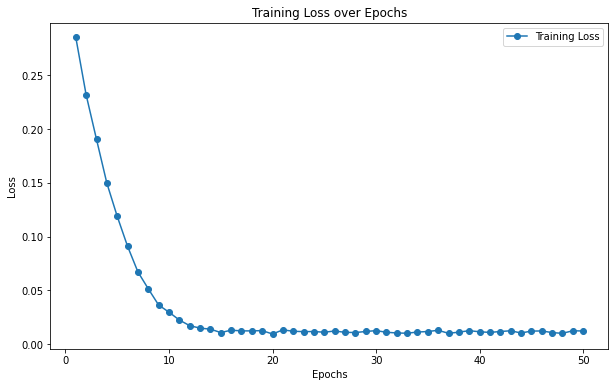

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

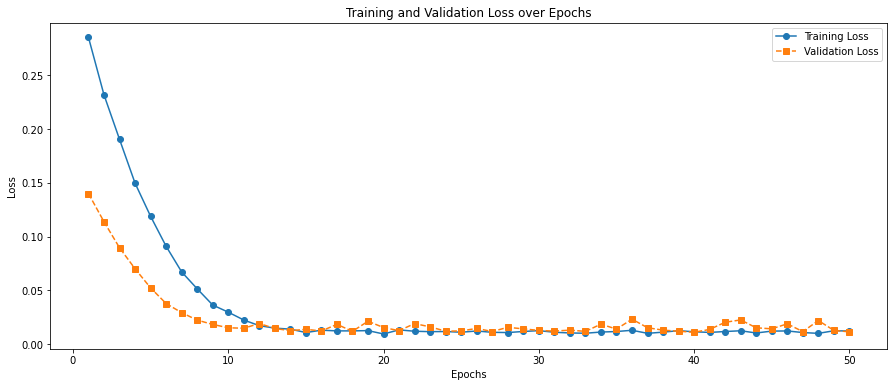

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Greenland_model_LT10/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.10851279287280473
MAE : 0.08779799103257739


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,665974.250000,641562.292
1,657224.375000,734946.437
2,645785.375000,777596.225
3,601691.062500,687087.673
4,565086.187500,622337.816
5,417588.281250,467232.074
6,252738.140625,297495.641
7,274308.906250,268909.854
8,362108.031250,408072.791
9,463129.062500,552314.148


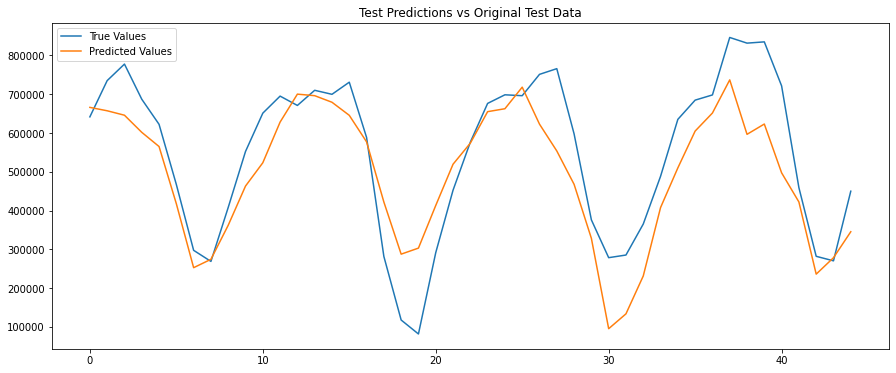

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

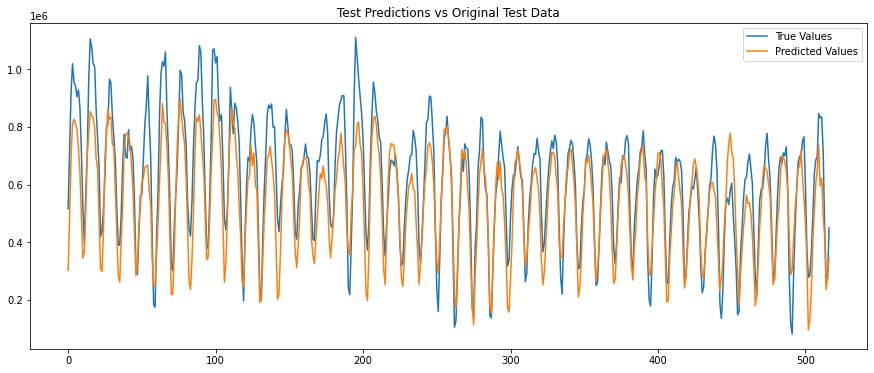

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()